In [29]:
library(tidyverse)
library(cowplot)
library(ragg)
library(RcppCNPy)

In [45]:
dat.comp = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/comp_mv_lr_stat.npy')
dat.clus = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/comp_mv_lr_clus.npy')

dat.theta.lh = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/th_grp_mv_lh.npy')
dat.theta.rh = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/th_grp_mv_rh.npy')
dat.magni.lh = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/rd_grp_mv_lh.npy')
dat.magni.rh = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/rd_grp_mv_rh.npy')

dat.rgba.lh = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/cls_mv_lh.npy')
dat.rgba.rh = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/cls_mv_rh.npy')

In [54]:
hemis = c(rep('LH',32492),rep('RH',32492))
theta = c(dat.theta.lh,dat.theta.rh)
magni = c(dat.magni.lh,dat.magni.rh)
clust = c(dat.clus, dat.clus)

hemis = factor(hemis, levels=c('LH','RH'))
clus = factor(clust, 
                    levels = c(0,1,6,4,5,3,2,7),
                    labels = c('NA', '55b', 'DLFL', "Broca's area", 'SPL','PSL','RI','11l'))

df.circ.lr = data.frame(theta, magni, hemis, clust, clus)
colnames(df.circ.lr) = c('Theta', 'Magnitude', 'Hemis', 'clust', 'Cluster')

head(df.circ.lr)

,Theta,Magnitude,Hemis,clust,Cluster
,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,0.9776731,0.2788877,LH,0,NA
2,2.0580176,0.8190907,LH,0,NA
3,3.2059874,0.6495430,LH,0,NA
4,3.3685823,0.1753379,LH,0,NA
5,6.2700093,0.9808285,LH,0,NA
6,1.4277650,0.1079935,LH,0,NA


Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


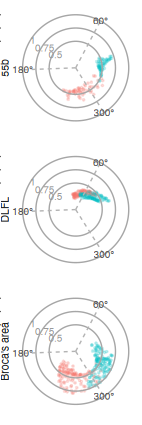

In [308]:
options(repr.plot.width = 30/25.4, repr.plot.height = 90/25.4)

df.draw = df.circ.lr %>% filter(clust==1 | clust==6 | clust==4)
p.circ.l = ggplot(df.draw, aes(x = Theta * 360 / (2 * pi), y = Magnitude)) +
                ggrastr::geom_point_rast(alpha=0.2, size=0.2, aes(color=Hemis)) +
                geom_hline(yintercept = c(0.5, 0.75, 1), color = "grey65", size = 0.3) +
                geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = 0.3, linetype = "dashed") +
                labs(x = NULL, y = NULL) +
                scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), , labels = c(' ', ' ', ' ')) +
                scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
                annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = 2) +
                annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = 2) +
                annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = 2) +
                annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = 2) +
                annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = 2) +
                annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = 2) +
                coord_polar(theta = "x", direction = -1, start = 4.75, clip = "off") +
                theme_void() +
                theme(legend.position = "none",
                        panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                        axis.ticks = element_line(linewidth = 0.3),
                        axis.text.x = element_text(size = 16, color = c("red", "#309617", "blue"), face = "bold"),
                        panel.grid.major = element_blank(), 
                        panel.grid.minor = element_blank(),
                        strip.text = element_text(size = 6, color = 'grey10', angle=90),
                        strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5)) + 
                facet_wrap(~Cluster, nrow=3, strip.position = "left")
        
print(p.circ.l)     

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


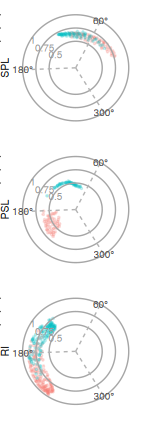

In [309]:
options(repr.plot.width = 30/25.4, repr.plot.height = 90/25.4)

df.draw = df.circ.lr %>% filter(clust==5 | clust==3 | clust==2)
p.circ.r = ggplot(df.draw, aes(x = Theta * 360 / (2 * pi), y = Magnitude)) +
                ggrastr::geom_point_rast(alpha=0.2, size=0.2, aes(color=Hemis)) +
                geom_hline(yintercept = c(0.5, 0.75, 1), color = "grey65", size = 0.3) +
                geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = 0.3, linetype = "dashed") +
                labs(x = NULL, y = NULL) +
                scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), , labels = c(' ', ' ', ' ')) +
                scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
                annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = 2) +
                annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = 2) +
                annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = 2) +
                annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = 2) +
                annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = 2) +
                annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = 2) +
                coord_polar(theta = "x", direction = -1, start = 4.75, clip = "off") +
                theme_void() +
                theme(legend.position = "none",
                        panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                        axis.ticks = element_line(linewidth = 0.3),
                        axis.text.x = element_text(size = 16, color = c("red", "#309617", "blue"), face = "bold"),
                        panel.grid.major = element_blank(), 
                        panel.grid.minor = element_blank(),
                        strip.text = element_text(size = 6, color = 'grey10', angle=90),
                        strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5)) + 
                facet_wrap(~Cluster, nrow=3, strip.position = "left")
        
print(p.circ.r)     

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


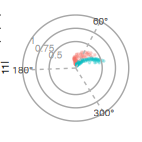

In [310]:
options(repr.plot.width = 30/25.4, repr.plot.height = 30/25.4)

df.draw = df.circ.lr %>% filter(clust==7)
p.circ.m = ggplot(df.draw, aes(x = Theta * 360 / (2 * pi), y = Magnitude)) +
                ggrastr::geom_point_rast(alpha=0.2, size=0.2, aes(color=Hemis)) +
                geom_hline(yintercept = c(0.5, 0.75, 1), color = "grey65", size = 0.3) +
                geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = 0.3, linetype = "dashed") +
                labs(x = NULL, y = NULL) +
                scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), , labels = c(' ', ' ', ' ')) +
                scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
                annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = 2) +
                annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = 2) +
                annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = 2) +
                annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = 2) +
                annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = 2) +
                annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = 2) +
                coord_polar(theta = "x", direction = -1, start = 4.75, clip = "off") +
                theme_void() +
                theme(legend.position = "none",
                        panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                        axis.ticks = element_line(linewidth = 0.3),
                        axis.text.x = element_text(size = 16, color = c("red", "#309617", "blue"), face = "bold"),
                        panel.grid.major = element_blank(), 
                        panel.grid.minor = element_blank(),
                        strip.text = element_text(size = 6, color = 'grey10', angle=90),
                        strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5)) + 
                facet_wrap(~Cluster, nrow=1, strip.position = "left")
        
print(p.circ.m)     

In [61]:
cls.hemis = c(rep('LH', 1169*3), rep('RH',1169*3))
cls.clust = rep(c(rep('55b',167), rep('RI',167), rep('PSL',167), rep("Broca's area",167), rep('SPL',167), rep('DLFL',167), rep('11l',167)),6)
cls.modal = rep(c(rep('Visual',1169), rep('Somatosensory',1169), rep('Auditory',1169)), 2)

cls.hemis = factor(cls.hemis, levels=c('LH','RH'))
cls.clust = factor(cls.clust, levels = c('55b', 'DLFL', "Broca's area", 'SPL','PSL','RI','11l'))
cls.modal = factor(cls.modal, levels = c('Visual', 'Somatosensory', 'Auditory'))

rgba.cls = c(dat.rgba.lh[,1],dat.rgba.lh[,2],dat.rgba.lh[,3], dat.rgba.rh[,1],dat.rgba.rh[,2],dat.rgba.rh[,3])

df.cls = data.frame(rgba.cls, cls.modal, cls.hemis, cls.clust)
colnames(df.cls) = c('Betas', 'Modal', 'Hemis', 'Cluster')

head(df.cls)
str(df.cls)

,Betas,Modal,Hemis,Cluster
,<dbl>,<fct>,<fct>,<fct>
1,0.02388718,Visual,LH,55b
2,0.09761117,Visual,LH,55b
3,0.05170482,Visual,LH,55b
4,0.32692259,Visual,LH,55b
5,0.30065744,Visual,LH,55b
6,0.20203627,Visual,LH,55b


'data.frame':	7014 obs. of  4 variables:
 $ Betas  : num  0.0239 0.0976 0.0517 0.3269 0.3007 ...
 $ Modal  : Factor w/ 3 levels "Visual","Somatosensory",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Hemis  : Factor w/ 2 levels "LH","RH": 1 1 1 1 1 1 1 1 1 1 ...
 $ Cluster: Factor w/ 7 levels "55b","DLFL","Broca's area",..: 1 1 1 1 1 1 1 1 1 1 ...


In [219]:
max(rgba.cls)

[1] 1.316254

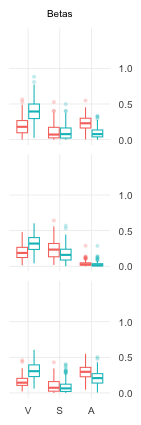

In [228]:
options(repr.plot.width = 30/25.4, repr.plot.height = 90/25.4)

df.draw = df.cls %>% filter(Cluster=='55b' | Cluster=='DLFL' | Cluster=="Broca's area")
p.box.l = ggplot(df.draw, aes(x = Modal, y = Betas)) +
            geom_boxplot(aes(color=Hemis), outlier.size = 0.5, outlier.alpha = 0.2, size=0.3) +
            scale_x_discrete(labels = c('V','S','A')) +
            scale_y_continuous(guide = guide_axis(position='right'), , limits = c(0, 1.5), breaks = c(0, 0.5, 1), labels = c('0.0','0.5','1.0')) +
            theme_minimal() +
            facet_wrap(~Cluster, nrow=3, strip.position = "right") +
            labs(title='Betas') +
            theme(legend.position = "none",
                    panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                    axis.title = element_blank(),
                    axis.text.x = element_text(size = 6),
                    axis.text.y = element_text(size = 6),
                    panel.grid.major = element_line(size=0.2), 
                    panel.grid.minor = element_blank(),
                    # strip.text = element_text(size = 6, color = 'grey10'),
                    strip.text = element_blank(),
                    strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5),
                    plot.title = element_text(size = 6, face = "plain", hjust = 0.5)) 
        
print(p.box.l)     

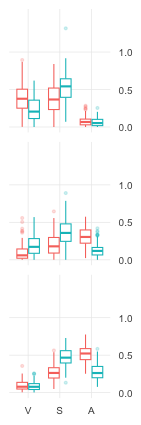

In [247]:
options(repr.plot.width = 30/25.4, repr.plot.height = 90/25.4)

df.draw = df.cls %>% filter(Cluster=='SPL' | Cluster=='PSL' | Cluster=="RI")
p.box.r = ggplot(df.draw, aes(x = Modal, y = Betas)) +
            geom_boxplot(aes(color=Hemis), outlier.size = 0.5, outlier.alpha = 0.2, size=0.3) +
            scale_x_discrete(labels = c('V','S','A')) +
            scale_y_continuous(guide = guide_axis(position='right'), limits = c(0, 1.5), breaks = c(0, 0.5, 1), labels = c('0.0','0.5','1.0')) +
            theme_minimal() +
            facet_wrap(~Cluster, nrow=3, strip.position = "right") +
        #     labs(title='Betas') +
            theme(legend.position = "none",
                    panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                    axis.title = element_blank(),
                    axis.text.x = element_text(size = 6),
                    axis.text.y = element_text(size = 6),
                    panel.grid.major = element_line(size=0.2), 
                    panel.grid.minor = element_blank(),
                    # strip.text = element_text(size = 6, color = 'grey10'),
                    strip.text = element_blank(),
                    strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5),
                    plot.title = element_text(size = 6, face = "plain", hjust = 0.5)) 
        
print(p.box.r)

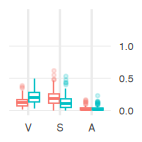

In [326]:
options(repr.plot.width = 30/25.4, repr.plot.height = 30/25.4)

df.draw = df.cls %>% filter(Cluster=='11l')
p.box.m = ggplot(df.draw, aes(x = Modal, y = Betas)) +
            geom_boxplot(aes(color=Hemis), outlier.size = 0.5, outlier.alpha = 0.2, size=0.3) +
            scale_x_discrete(labels = c('V','S','A')) +
            scale_y_continuous(guide = guide_axis(position='right'), limits = c(0, 1.5), breaks = c(0, 0.5, 1), labels = c('0.0','0.5','1.0')) +
            theme_minimal() +
            facet_wrap(~Cluster, nrow=1, strip.position = "right") +
        #     labs(title='Betas') +
            theme(legend.position = "none",
                    panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                    axis.title = element_blank(),
                    axis.text.x = element_text(size = 6),
                    axis.text.y = element_text(size = 6),
                    # panel.grid.major = element_blank(),  
                    panel.grid.major.y = element_line(size=0.2), 
                    panel.grid.minor = element_blank(),
                    # strip.text = element_text(size = 6, color = 'grey10'),
                    strip.text = element_blank(),
                    strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5),
                    plot.title = element_text(size = 6, face = "plain", hjust = 0.5)) 
        
print(p.box.m)

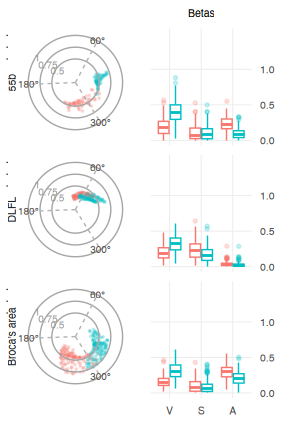

In [313]:
options(repr.plot.width = 60/25.4, repr.plot.height = 90/25.4)

p.circ.l.modi = plot_grid(NULL,p.circ.l,NULL, ncol=1, rel_heights=c(5,80,5))
f7.left = plot_grid(p.circ.l.modi, p.box.l, nrow=1, rel_widths=c(1,1))

ggdraw(f7.left)

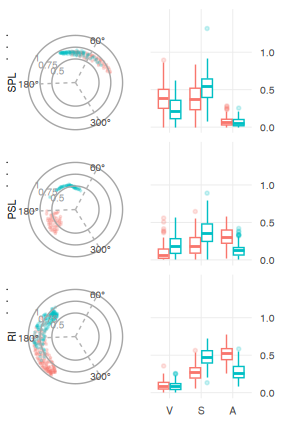

In [314]:
options(repr.plot.width = 60/25.4, repr.plot.height = 90/25.4)

p.circ.r.modi = plot_grid(NULL,p.circ.r,NULL, ncol=1, rel_heights=c(5,80,5))
f7.right = plot_grid(p.circ.r.modi, p.box.r, nrow=1, rel_widths=c(1,1))

ggdraw(f7.right)

In [85]:
img.sf = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_07/sf-lr.png'
img.lg = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_05/legend.png'

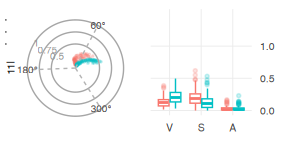

In [315]:
options(repr.plot.width = 60/25.4, repr.plot.height = 30/25.4)

p.circ.m.modi = plot_grid(NULL, p.circ.m, NULL, ncol=1, rel_heights=c(5/3,80/3,5/3))
f7.mid.bottom = plot_grid(p.circ.m.modi, p.box.m, nrow=1, rel_widths=c(1,1))

ggdraw(f7.mid.bottom)

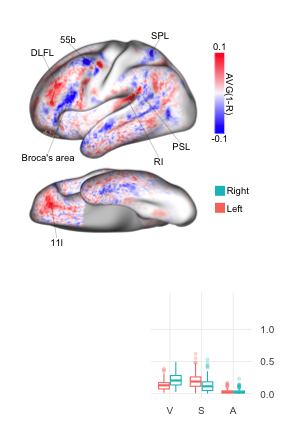

In [283]:
options(repr.plot.width = 60/25.4, repr.plot.height = 90/25.4)

p.circ.m.modi = plot_grid(p.circ.m,NULL, ncol=1, rel_heights=c(8,1.8))
f7.mid.bottom = plot_grid(NULL, p.box.m, nrow=1, rel_widths=c(1,1))
f7.mid.base = plot_grid(NULL, f7.mid.bottom, ncol=1, rel_heights=c(2,1))
f7.mid = ggdraw(f7.mid.base) +
            # annotate('text', x = 0.5, y = 0.9, label = 'AVG(1-R)', size = 2, hjust = 'center',) +

            draw_image(img.sf, x = 0.1, y = 0.45, scale = 0.6, halign=0, valign=0) +
            draw_image(img.lg, x = 0.75, y = 0.68, scale = 0.2, halign=0, valign=0) +
            annotate('text', x = 0.81, y = 0.78, label = 'AVG(1-R)', size = 2, hjust = 'center',angle=-90) +
            annotate('text', x = 0.775, y = 0.89, label = '0.1', size = 2, hjust = 'center') +
            annotate('text', x = 0.775, y = 0.675, label = '-0.1', size = 2, hjust = 'center') +
            # annotate('segment', x=0.79, xend=0.79, y=0., yend=0.933, linewidth=0.1, color='red') +
            # annotate('segment', x=0.76, xend=0.76, y=0., yend=0.933, linewidth=0.1, color='red') +

            annotate(geom = 'rect', xmin = 0.758, xmax = 0.758 + 0.035, ymin = 0.54, ymax = 0.54 + 0.035/3*2, fill = '#06C0C5') +
            annotate(geom = 'rect', xmin = 0.758, xmax = 0.758 + 0.035, ymin = 0.5, ymax = 0.5 + 0.035/3*2, fill = '#FA786E') +
            annotate(geom = 'text', x = 0.8, y = 0.553, label = 'Right', size = 2, hjust = 'left') +
            annotate(geom = 'text', x = 0.8, y = 0.51, label = 'Left', size = 2, hjust = 'left') +

            annotate(geom='curve', x = 0.2, y = 0.8, xend = 0.15, yend = 0.87, curvature=0, alpha=0.6, color='black', linetype = "solid", size=.1) +
            annotate(geom='text',  x = 0.15, y = 0.878, label = 'DLFL', hjust = 'center', size=2) +
            annotate(geom='curve', x = 0.3, y = 0.86, xend = 0.24, yend = 0.9, curvature=0, alpha=.6, color='black', linetype = "solid", size=.1) +
            annotate(geom='text',  x = 0.24, y = 0.908, label = '55b', hjust = 'center', size=2) +
            annotate(geom='curve', x = 0.24, y = 0.76, xend = 0.17, yend = 0.64, curvature=0, alpha=.6, color='black', linetype = "solid", size=.1) +
            annotate(geom='text',  x = 0.17, y = 0.63, label = "Broca's area", hjust = 'center', size=2) +
            annotate(geom='curve', x = 0.53, y = 0.87, xend = 0.565, yend = 0.91, curvature=0, alpha=.6, color='black', linetype = "solid", size=.1) +
            annotate(geom='text',  x = 0.565, y = 0.918, label = "SPL", hjust = 'center', size=2) +
            annotate(geom='curve', x = 0.49, y = 0.785, xend = 0.64, yend = 0.66, curvature=0, alpha=.6, color='black', linetype = "solid", size=.1) +
            annotate(geom='text',  x = 0.64, y = 0.655, label = "PSL", hjust = 'center', size=2) +
            annotate(geom='curve', x = 0.45, y = 0.765, xend = 0.56, yend = 0.63, curvature=0, alpha=.6, color='black', linetype = "solid", size=.1) +
            annotate(geom='text',  x = 0.56, y = 0.62, label = "RI", hjust = 'center', size=2) +
            annotate(geom='curve', x = 0.18, y = 0.52, xend = 0.2, yend = 0.44, curvature=0, alpha=.6, color='black', linetype = "solid", size=.1) +
            annotate(geom='text',  x = 0.2, y = 0.43, label = "11l", hjust = 'center', size=2)


ggdraw(f7.mid)

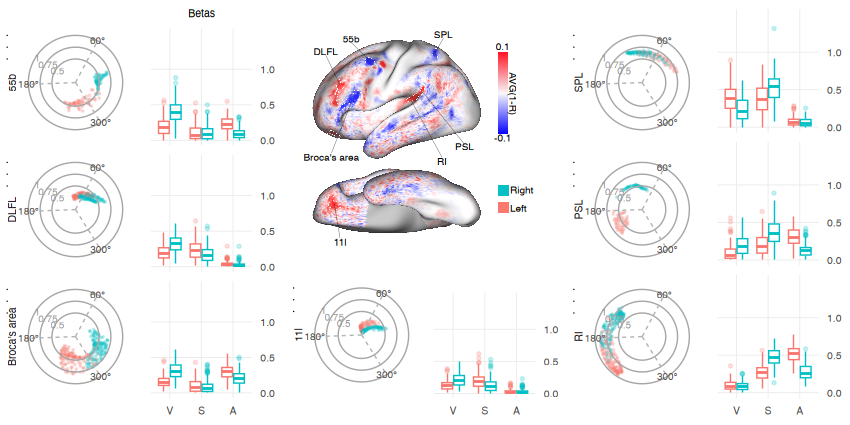

In [316]:
options(repr.plot.width = 180/25.4, repr.plot.height = 90/25.4)

f7.final = plot_grid(f7.left, f7.mid, f7.right, nrow=1, rel_widths=c(1,1,1)) + 
            draw_plot(p.circ.m, x=0.275, y=0.06, halign = 0., valign = 0., scale=0.29) 
            # annotate('segment', x=0, xend=1, y=0.1, yend=0.1, linewidth=0.1, color='red') +
            # annotate('segment', x=0, xend=1, y=0.32, yend=0.32, linewidth=0.1, color='red') +
            # annotate('segment', x=1/3, xend=1/3, y=0., yend=1, linewidth=0.1, color='red')

ggdraw(f7.final)

In [306]:
agg_png("/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/f_07_v5_modi.png", 
           width = 18, height = 9, res = 600, units = 'cm', background = 'white')
print(f7.final)
invisible(dev.off())

In [317]:
cowplot::ggsave2(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_07_v6.pdf', width = 18,height = 9,units =  "cm", dpi = 600, plot=f7.final)